# Creating a Investment and Trading Web App
## Using PyTorch and SageMaker

_Deep Learning Nanodegree Program | Deployment_

---

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import warnings
import wget

In [27]:
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')

In [28]:
output_path = '../data/raw/'
url = 'https://investment-and-trading-udacity.s3-us-west-2.amazonaws.com/JPM 2009-2019.csv'
filename = wget.download(url, out = output_path)

100% [............................................................................] 187676 / 187676

In [30]:
stock_data = pd.read_csv('../data/raw/JPM 2009-2019.csv') 

In [31]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 7 columns):
Date         2654 non-null object
Open         2654 non-null float64
High         2654 non-null float64
Low          2654 non-null float64
Close        2654 non-null float64
Adj Close    2654 non-null float64
Volume       2654 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 145.2+ KB


In [32]:
stock_data.shape

(2654, 7)

In [33]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,31.19,31.64,30.47,31.35,24.56,32494900
1,2009-01-05,30.73,30.77,29.08,29.25,22.92,44069400
2,2009-01-06,29.79,30.42,29.51,29.88,23.41,44216300
3,2009-01-07,29.15,29.40,28.00,28.09,22.01,42156500
4,2009-01-08,27.90,27.95,26.86,27.22,21.33,52075800


In [34]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"2,654.00","2,654.00","2,654.00","2,654.00","2,654.00","2,654.00"
mean,62.13,62.72,61.53,62.13,55.72,"26,770,442.20"
std,25.80,25.91,25.69,25.79,27.44,"21,861,503.66"
min,15.37,17.29,14.96,15.90,12.46,"3,680,000.00"
25%,41.50,41.94,41.03,41.53,33.33,"13,436,550.00"
50%,56.62,57.00,56.14,56.67,49.27,"19,304,750.00"
75%,78.75,79.44,78.30,79.25,73.62,"32,481,600.00"
max,119.13,119.33,118.08,118.77,115.30,"217,294,200.00"


In [35]:
stock_data = stock_data.sort_values('Date')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,31.19,31.64,30.47,31.35,24.56,32494900
1,2009-01-05,30.73,30.77,29.08,29.25,22.92,44069400
2,2009-01-06,29.79,30.42,29.51,29.88,23.41,44216300
3,2009-01-07,29.15,29.40,28.00,28.09,22.01,42156500
4,2009-01-08,27.90,27.95,26.86,27.22,21.33,52075800


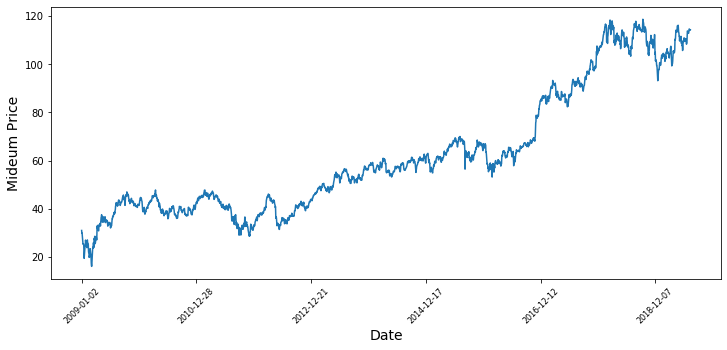

In [36]:
plt.figure(figsize = (12,5))
plt.plot(range(stock_data.shape[0]), (stock_data['Low'] + stock_data['High']) / 2.0)
plt.xticks(range(0, stock_data.shape[0], 500), stock_data['Date'].loc[::500], rotation = 45, fontsize = 8)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Mideum Price',fontsize = 14)
plt.show()

In [37]:
# Index for train, validation and test
train_pct = 0.70
val_pct = 0.20
test_pct = 1 - train_pct - val_pct

print(int(train_pct * stock_data.shape[0]))
print(int(val_pct * stock_data.shape[0]))
print(int(test_pct * stock_data.shape[0]))



min_train_idx, max_train_idx = 0, int(stock_data.shape[0] * train_pct)
min_val_idx, max_val_idx = max_train_idx + 1, max_train_idx + int(stock_data.shape[0] * val_pct)
min_test_idx, max_test_idx = max_val_idx + 1,  stock_data.shape[0] 

1857
530
265


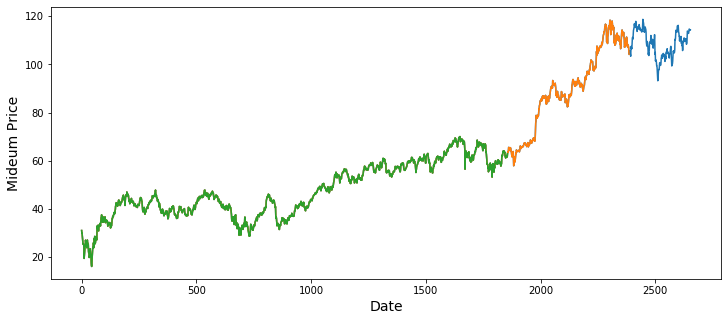

In [38]:
plt.figure(figsize = (12,5))
plt.plot(range(stock_data[min_train_idx:max_test_idx].shape[0]), (stock_data['Low'][min_train_idx:max_test_idx] + stock_data['High'][min_train_idx:max_test_idx]) / 2.0)
plt.plot(range(stock_data[min_train_idx:max_val_idx].shape[0]), (stock_data['Low'][min_train_idx:max_val_idx] + stock_data['High'][min_train_idx:max_val_idx]) / 2.0)
plt.plot(range(stock_data[min_train_idx:max_train_idx].shape[0]), (stock_data['Low'][min_train_idx:max_train_idx] + stock_data['High'][min_train_idx:max_train_idx]) / 2.0)
#plt.xticks(range(0, stock_data.shape[0], 500), stock_data['Date'].loc[::500], rotation = 45, fontsize = 8)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Mideum Price',fontsize = 14)
plt.show()